In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("features_ravdess_05.csv")

# Assuming df is already loaded
X = df.drop(columns=["filename", "label"])
y = df["label"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


KeyError: "['filename', 'label'] not found in axis"

In [3]:
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

mlp_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp', MLPClassifier(max_iter=500, random_state=42))])

Accuracy: 0.6458333333333334
              precision    recall  f1-score   support

       angry       0.77      0.79      0.78        38
        calm       0.69      0.76      0.72        38
     disgust       0.71      0.84      0.77        38
     fearful       0.58      0.74      0.65        39
       happy       0.55      0.41      0.47        39
     neutral       0.47      0.42      0.44        19
         sad       0.56      0.47      0.51        38
   surprised       0.71      0.62      0.66        39

    accuracy                           0.65       288
   macro avg       0.63      0.63      0.63       288
weighted avg       0.64      0.65      0.64       288



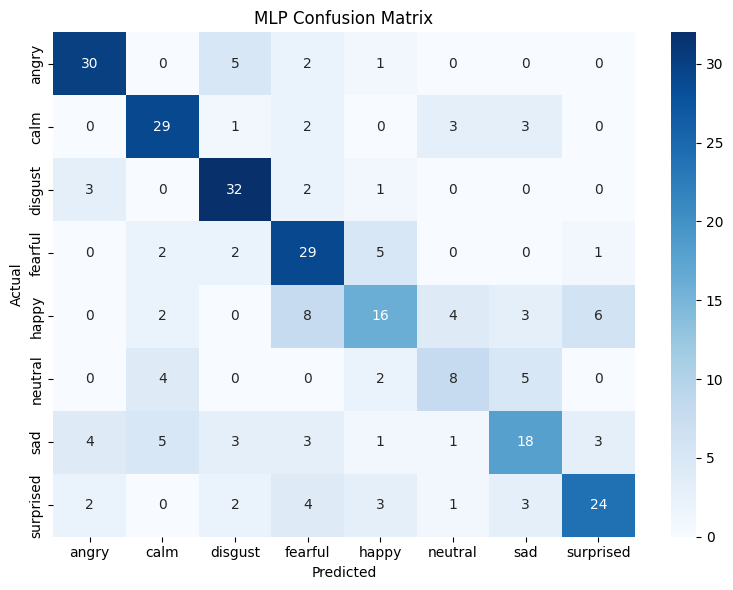

In [4]:
y_pred = mlp_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
